# Proability and Samples

To generate a new problem and solution, select "*run all*" from the __Runtime__ menu. 

In [459]:
# @title Click to hide code
import numpy as np
import random, math
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import Markdown, display


def sample_mean_question():
    n = random.randint(5, 25)
    population_mean = random.randint(10, 100)
    sd = random.randint(5, 20)
    
    # set the value for the sample mean to be used in the practice problem
    multiplier = random.uniform(0, 1)
    distance = round(sd * multiplier)
    
    roll = random.randint(1, 2)
    if roll == 1:
        dir = "greater"
        sample_mean = population_mean - distance
    elif roll == 2:
        dir = "less"
        sample_mean = population_mean + distance
    #else: # not yet active
        #dir = "tbd"

    print(f"what is the probability of obtaining a random sample (n = {n}) with a mean {dir} than {sample_mean}?")

    values = {"n": n, "population_mean": population_mean, "sample_mean": sample_mean, "sd": sd, "roll": roll}
    
    generate_plot("scores", values)

    return values


# creates the plot shading the region of interest
def generate_plot(type, data: dict): 
    if type == "scores":
        variability = data["sd"]
        text = "$\\sigma$"
        title = "Population Distribution"
        axis_label = "X"
    elif type == "means":
        variability = data["sem"]
        text = "$\\sigma_M$"
        title = "Distribution of Sample Means"
        axis_label = "M"

    # generate x values
    x = np.linspace(data["population_mean"] - 4*data["sd"], data["population_mean"] + 4*data["sd"], 1000)

    # generate y values
    y = stats.norm.pdf(x, data["population_mean"], variability)

    plt.plot(x, y)
    plt.axvline(x=data["sample_mean"], color='b', linestyle='--', linewidth=1)
    plt.title(f"{title}: $\\mu$ = {data["population_mean"]}, {text} = {variability}")
    plt.xlabel(f'{axis_label}')
    plt.grid(False)
    plt.yticks([])
    
    if data["roll"] == 1:
         plt.fill_between(x, y, where=(x >= data["sample_mean"]), color='skyblue', alpha=0.5)
    elif data["roll"] == 2:
         plt.fill_between(x, y, where=(x <= data["sample_mean"]), color='skyblue', alpha=0.5)
    #else:
        #vals = sorted([data[4], data[5]])
        #plt.fill_between(x, y, where=(x >= vals[0]) & (x <= vals[1]), color='skyblue', alpha=0.5)
      
    plt.show()


def standard_error(data: dict):
    n = data["n"]
    sd = data["sd"]
    sem = round(sd/(round(math.sqrt(n),2)),2)

    print("formula for the calculating the standard error:")
    display(Markdown(f"$\\sigma_M = \\frac{{\\sigma}}{{\\sqrt{{N}}}}$"))
    print("values necessary to solve equation:")
    display(Markdown(f"$\\sigma = {{{sd}}}$"))
    display(Markdown(f"$n = {{{n}}}$"))
    display(Markdown(f"solve for $\\sigma^2:$"))
    display(Markdown(f"$\\sigma_M = \\frac{{{sd}}}{{\\sqrt{n}}}$"))
    display(Markdown(f"$\\sigma_M = \\frac{{{sd}}}{{{round(math.sqrt(n),2)}}}$"))
    display(Markdown(f"$\\sigma_M = {{{sem}}}$"))

    data["sem"] = sem
    return data


def z_score(data: dict):
    sample_mean = data["sample_mean"]
    population_mean = data["population_mean"]
    standard_error = data["sem"]
    z = round(((sample_mean - population_mean)/standard_error),2)

    print("formula for the calculating z-score:")
    display(Markdown(f"$ z = \\frac{{M - \\mu}}{{\\sigma_M}}$"))

    print("values necessary to solve equation:")
    display(Markdown(f"$M = {{{sample_mean}}}$"))
    display(Markdown(f"$\\mu = {{{population_mean}}}$"))
    display(Markdown(f"$\\sigma_M = {{{standard_error}}}$"))

    display(Markdown(f"solve for $z$"))
    display(Markdown(f"$ z = \\frac{{{sample_mean} - {population_mean}}}{{{standard_error}}}$"))
    display(Markdown(f"$ z = \\frac{{{sample_mean - population_mean}}}{{{standard_error}}}$"))
    display(Markdown(f"$ z = {{{z}}}$"))

    data["z"] = z
    return data


# displays the solution for the primary question - p(x/z > value) 
def problem_solution(data: dict):
    
    if data["roll"] == 1:
        answer = 1 - round(stats.norm.cdf(data["z"]), 4)
        text = f"p(M > {data['population_mean']}) = {round(answer, 4)}"
    elif data["roll"] == 2:
        answer = round(stats.norm.cdf(data["z"]), 4)
        text = f"p(M < {data['population_mean']}) = {round(answer, 4)}"
    #else:
        #zvals = sorted([data[3], data[4]])
        #xvals = sorted([data[1], data[2]])
        #answer = round(stats.norm.cdf(zvals[1]), 4) - round(stats.norm.cdf(zvals[0]), 4)
        #text = f"p({xvals[0]} < {qtype} < {xvals[1]}) = {round(answer, 4)}"
    
    print(text)

what is the probability of obtaining a random sample (n = 7) with a mean less than 79?


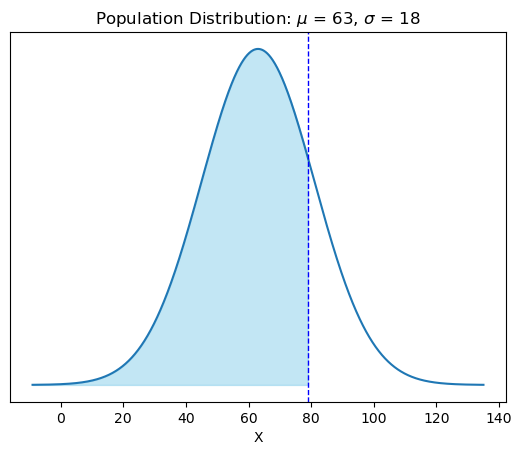

In [460]:
question = sample_mean_question()

We need the use the distribution of sample means.  The first step is to calculate the standard error of the mean.

In [461]:
question = standard_error(question)

formula for the calculating the standard error:


$\sigma_M = \frac{\sigma}{\sqrt{N}}$

values necessary to solve equation:


$\sigma = {18}$

$n = {7}$

solve for $\sigma^2:$

$\sigma_M = \frac{18}{\sqrt7}$

$\sigma_M = \frac{18}{2.65}$

$\sigma_M = {6.79}$

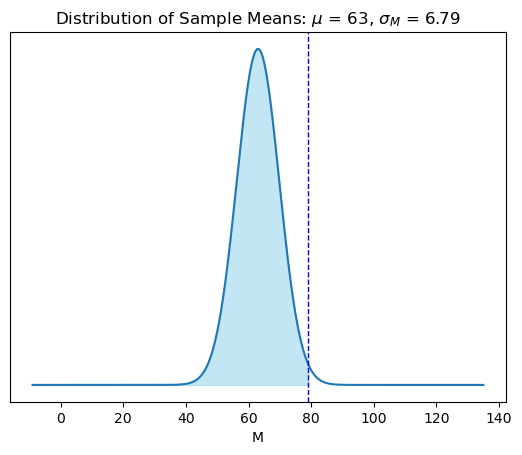

In [462]:
generate_plot("means", question)

Now that we have the distribution of sample means, calculate the *z*-score for our sample mean

In [463]:
question = z_score(question)

formula for the calculating z-score:


$ z = \frac{M - \mu}{\sigma_M}$

values necessary to solve equation:


$M = {79}$

$\mu = {63}$

$\sigma_M = {6.79}$

solve for $z$

$ z = \frac{79 - 63}{6.79}$

$ z = \frac{16}{6.79}$

$ z = {2.36}$

Using the Unit Normal Table, look up the correct proportion...

In [464]:
problem_solution(question)

p(M < 63) = 0.9909
